# Рабочая тетрадь No 4

In [403]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### 1.1.3 Задание

Представьте  собственные  данные  и  постройте  эктраполяцию  полиномами 
первой, второй и третьей степени. 

In [404]:
import math

delta = 1.0
x = np.linspace(0, 10, 11)
y = math.e ** x + delta * (np.random.rand(11) - 0.5)
x += delta * (np.random.rand(11) - 0.5)

print(x)
print(y)

[-0.07808256  1.34935162  1.7342857   2.54080198  3.89339092  4.61161853
  6.12398157  6.8045353   8.26939507  9.02620843  9.50583159]
[8.71060552e-01 2.77270588e+00 6.94877588e+00 2.01183390e+01
 5.48419138e+01 1.48152200e+02 4.03507781e+02 1.09625683e+03
 2.98133624e+03 8.10312483e+03 2.20261474e+04]


#### Эктраполяция полиномом первой степени

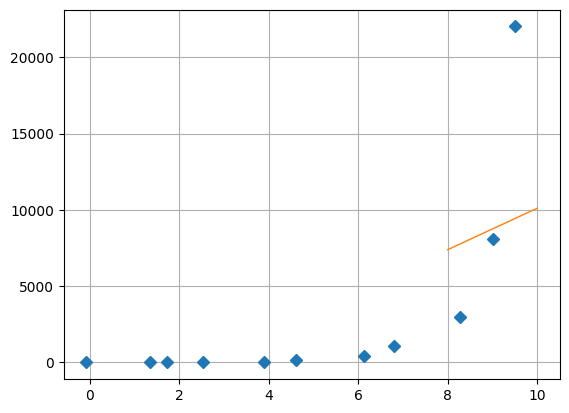

In [405]:
m = np.vstack((x, np.ones(11))).T
s = np.linalg.lstsq(m,y,rcond = None)[0]

x_prec = np.linspace(8, 10, 101)

plt.plot(x, y,'D')
plt.plot(x_prec, s[0] * x_prec + s[1], '-', lw=1)
plt.grid()

#### Эктраполяция полиномом второй степени

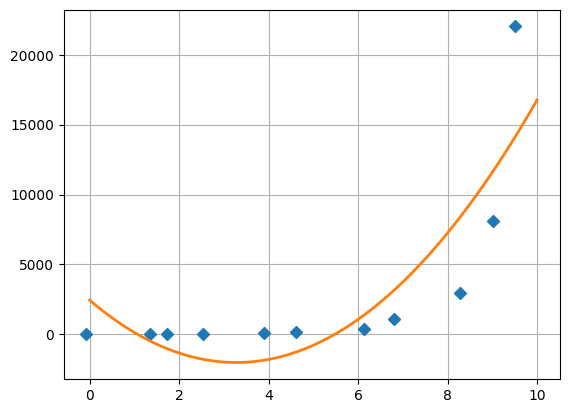

In [406]:
m = np.vstack((x**2, x, np.ones(11))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = np.linspace(0, 10, 101)

plt.plot(x, y,'D')
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec + s[2], '-', lw=2)
plt.grid()

#### Эктраполяция полиномом третьей степени

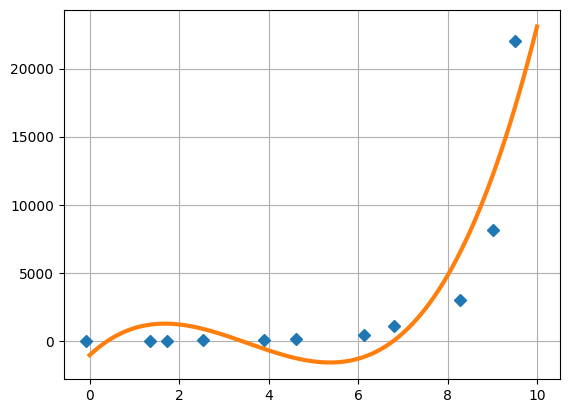

In [407]:
m = np.vstack((x**3, x**2, x, np.ones(11))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = np.linspace(0, 10, 101)

plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2] * x_prec + s[3], '-', lw=3)
plt.grid()

### 1.1.5 Задача

Необходимо проверить гипотезу, что наши точечно заданная функция ложится 
на кривые вида:  
1. $f(x,b) = b_0+b_1x$
2. $f(x,b) = b_0+b_1x+b_2x^2$
3. $f(x,b) = b_0+b_1\ln(x)$
4. $f(x,b) = b_0x^{b_1}$ 

#### Функция №1

In [439]:
beta = (1.24, 1.74)
def f(x, b0, b1):
    return b0 + b1 * x

xdata = np.linspace(0,5,50)
y = f(xdata, *beta)
ydata = y + 1 * np.random.randn(len(xdata))

from scipy.optimize import curve_fit
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

[1.45930946 1.67619359]
0.04053187863635288
35.64010010802867


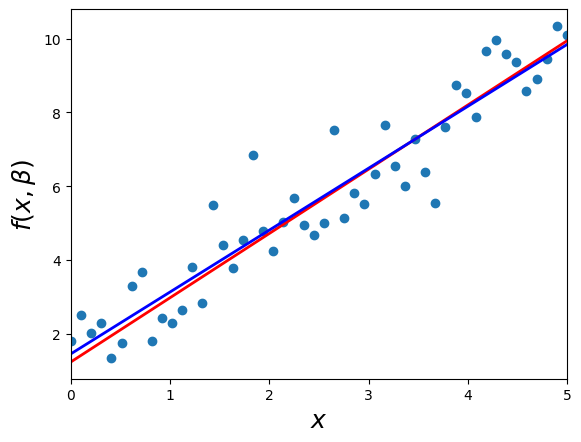

In [440]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)
plt.show()

#### Функция №2

In [410]:
beta = (0.51, 2.74, 1.17)
def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x**2

xdata = np.linspace(0,5,50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))

from scipy.optimize import curve_fit
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

[0.52433999 2.73790669 1.17001858]
0.0001973378757534478
0.1645591178934446


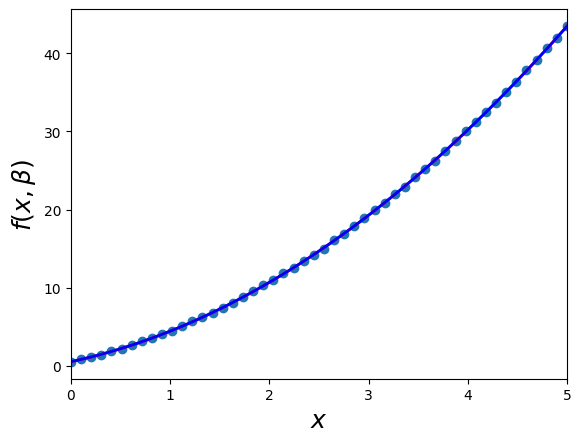

In [411]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)
plt.show()

#### Функция №3

In [412]:
beta = (1.37, 0.48)

def f(x, b0, b1):
    return b0 + b1 * np.log(x)

xdata = np.linspace(0.01,5,50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))

from scipy.optimize import curve_fit
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

[1.37468848 0.47099867]
5.1105391253661135e-05
0.15167039301730045


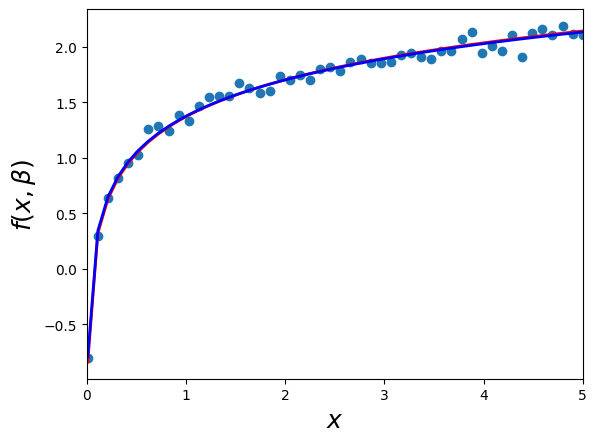

In [413]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)
plt.show()

#### Функция №4

In [414]:
beta = (0.89, 1.92)
def f(x, b0, b1):
    return b0 + np.float_power(x, b1)

xdata = np.linspace(0,5,50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))

from scipy.optimize import curve_fit
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

[0.88850056 1.91981925]
9.931739265191307e-05
0.1375688913692001


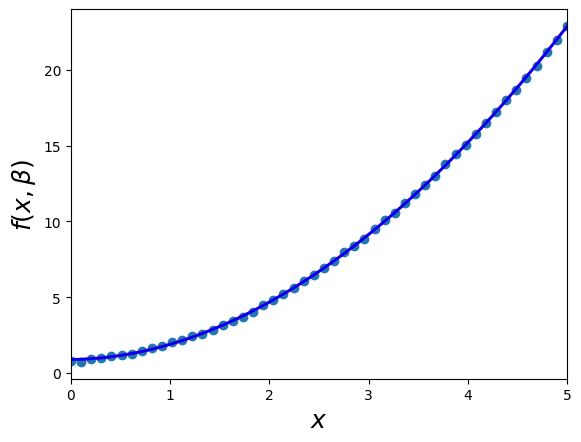

In [415]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)
plt.show()

### 1.2.1 Задание

Постройте  модель  линейной  регрессии  для  произвольных  данных  из  двух 
столбцов. Для примера можно взять точечную зависимость заработной платы от 
опыта работы: 
(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv).  
Найдите коэффициенты линии регрессии. Постройте прогноз. 

In [416]:
url = 'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'

ds = pd.read_csv(url)

ds.describe()

YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000

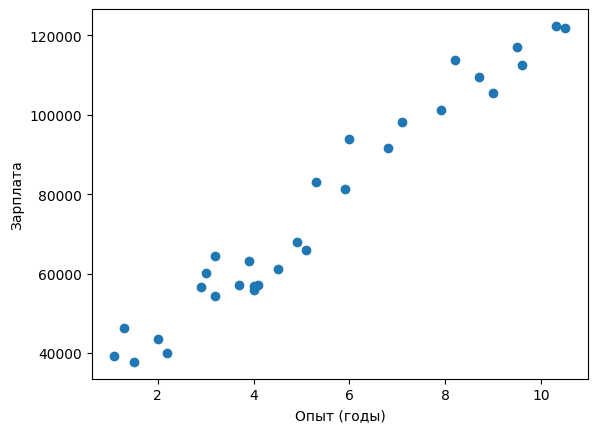

In [417]:
plt.scatter(ds['YearsExperience'], ds['Salary'])
plt.xlabel('Опыт (годы)')
plt.ylabel('Зарплата')
plt.show()

In [418]:
X = ds.iloc[:, :-1].values
y = ds.iloc[:, 1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [419]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)

26780.09915062818
[9312.57512673]


In [420]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

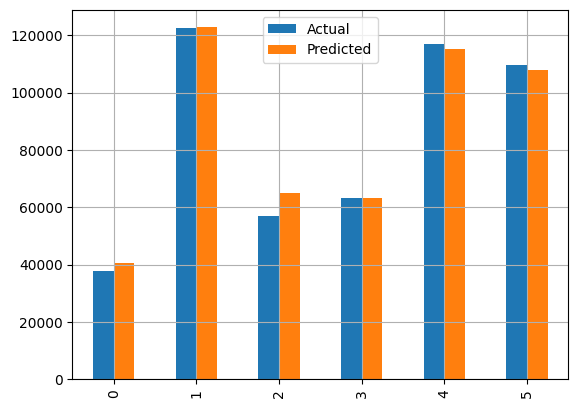

In [421]:
df.plot(kind='bar')
plt.grid()
plt.show()

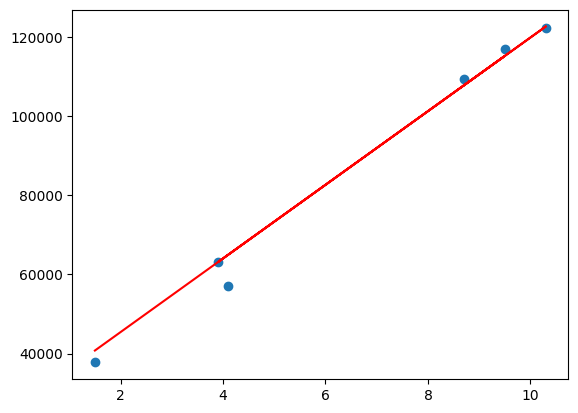

In [422]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')
plt.show()

### 1.3.2 Задание

Постройте модель множественной линейной регрессии для произвольных 
данных из нескольких столбцов. Для примера можно взять потребления 
газа  (в  миллионах  галлонов)  в  48  штатах  США  или  набор  данных  о 
качестве красного вина (1) и (2) соответственно. Найдите коэффициенты 
множественной регрессии. Постройте прогноз. 

In [423]:
url = 'https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv'

ds = pd.read_csv(url)

ds.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [424]:
X = ds[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y = ds['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [425]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)

34.99871062872143
[ 4.12835075e-02 -1.14952802e+00 -1.77927063e-01  2.78700036e-02
 -1.87340739e+00  2.68362616e-03 -2.77748370e-03 -3.15166657e+01
 -2.54486051e-01  9.24040106e-01  2.67797417e-01]


In [426]:
pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])

Coefficient
fixed acidity            0.041284
volatile acidity        -1.149528
citric acid             -0.177927
residual sugar           0.027870
chlorides               -1.873407
free sulfur dioxide      0.002684
total sulfur dioxide    -0.002777
density                -31.516666
pH                      -0.254486
sulphates                0.924040
alcohol                  0.267797

In [427]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

df

Actual  Predicted
1109       6   5.782930
1032       5   5.036193
1002       7   6.596989
487        6   5.339126
979        5   5.939529
...      ...        ...
794        6   6.559757
813        4   6.017576
1322       5   6.251291
704        4   5.163926
1023       6   6.367205

[320 rows x 2 columns]

Средняя квадратичная ошибка

In [428]:
metrics.mean_squared_error(y_test,y_pred)

np.float64(0.38447119782012357)

### 1.3.2 Задание*

Экспериментально  получены  N  −  значений  величины  Y  при 
различных значениях величины X. Построить  полиномы первой и второй 
степени, аппроксимирующие результаты  эксперимента,  с  применением 
метода  наименьших  квадратов.  Результаты  выводятся  в  виде  таблиц 
значений и графиков, полученных полиномов. 

*Вариант:* 2

In [429]:
# Линейная функция
def linear_func(x, b0, b1):
    return b0 + b1 * x

# Квадратичная функция
def quadratic_func(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x**2

In [430]:
xdata = np.linspace(0, 1, 6)
ydata = np.asarray([5.0, 5.0, 4.0, 4.0, 6.0, 6.0])

In [431]:
beta_opt, beta_cov = curve_fit(linear_func, xdata, ydata, method='lm')
print(beta_opt)
df = pd.DataFrame({"x": xdata, "y": linear_func(xdata, *beta_opt)});
#df.columns=['xdata', 'ydata']
print(df)

[4.42857143 1.14285715]
     x         y
0  0.0  4.428571
1  0.2  4.657143
2  0.4  4.885714
3  0.6  5.114286
4  0.8  5.342857
5  1.0  5.571429


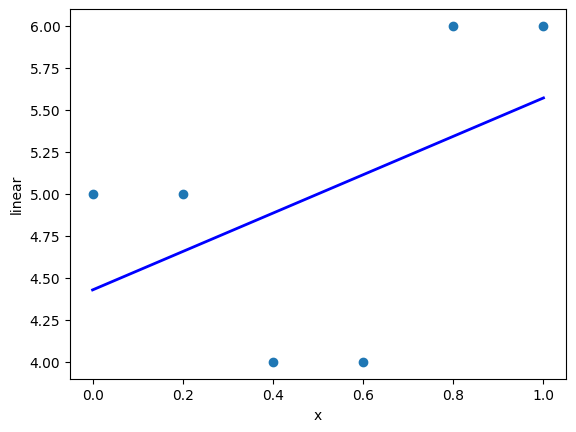

In [432]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, linear_func(xdata, *beta_opt), 'b', lw=2)
plt.xlabel('x')
plt.ylabel('linear')
plt.show()

In [433]:
beta_opt, beta_cov = curve_fit(quadratic_func, xdata, ydata, method='lm')
print(beta_opt)
df = pd.DataFrame({"x": xdata, "y": quadratic_func(xdata, *beta_opt)});
print(df)

[ 5.14285713 -4.21428562  5.35714277]
     x         y
0  0.0  5.142857
1  0.2  4.514286
2  0.4  4.314286
3  0.6  4.542857
4  0.8  5.200000
5  1.0  6.285714


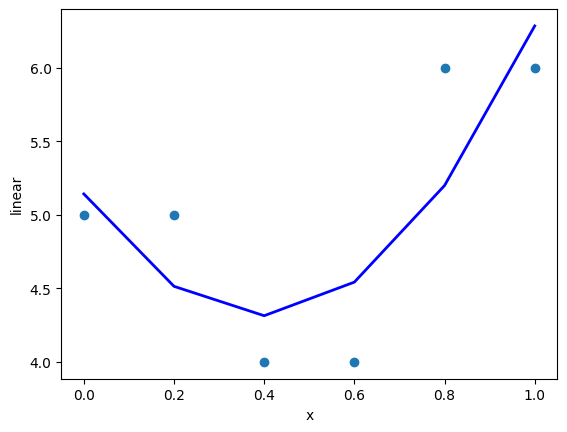

In [434]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, quadratic_func(xdata, *beta_opt), 'b', lw=2)
plt.xlabel('x')
plt.ylabel('linear')
plt.show()